##### We will be looking at data and see what will it cost for patients to get treatment.
##### A lot of factor can influence the cost of treatment 

### In the Project I will do:
* Explotory Data Analysis 
* Liniar Regression
* KMean
* Multi-Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\McNeal Fielies\Downloads\insurance.csv')

In [51]:
df.head()

In [5]:
# Checking for any missing values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

#smokers
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

#Region 
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [50]:
#Changing the "yes" or "no" in the Smokers Column to "0" and "1"
# This will be very usefull to the the Data  

from sklearn.preprocessing import OneHotEncoder

df_change = enc = OneHotEncoder(handle_unknown='ignore')
X = [['no', 1], ['yes', 3]]
enc.fit(X)

enc.categories_

enc.transform([['yes', 1], ['no', 4]]).toarray()


enc.inverse_transform([[0, 1, 1, 0,], [0, 0, 0, 1,]])


enc.get_feature_names_out(['smokers', 'group'])

array(['smokers_no', 'smokers_yes', 'group_1', 'group_3'], dtype=object)

In [11]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

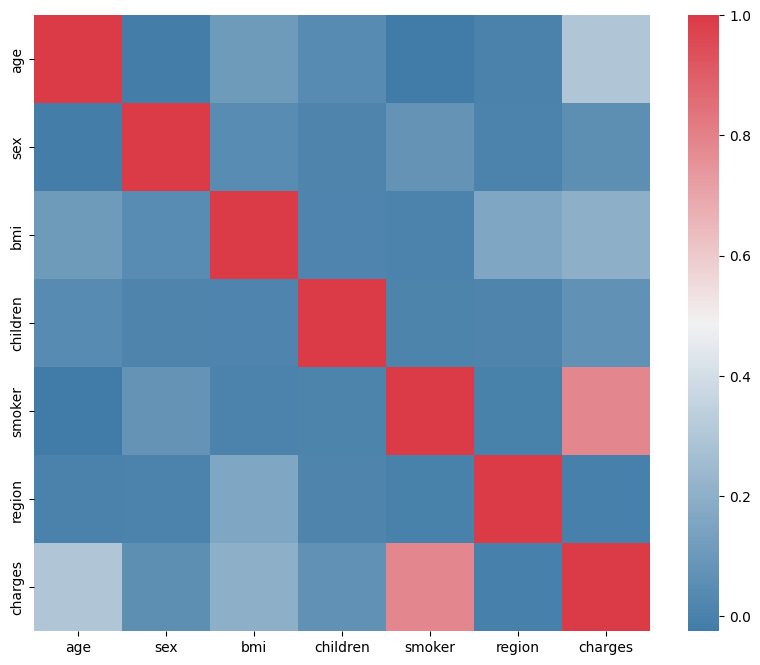

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#### The above Graph shows that the is a correlation with smokers! Lets Dive Deeper into smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

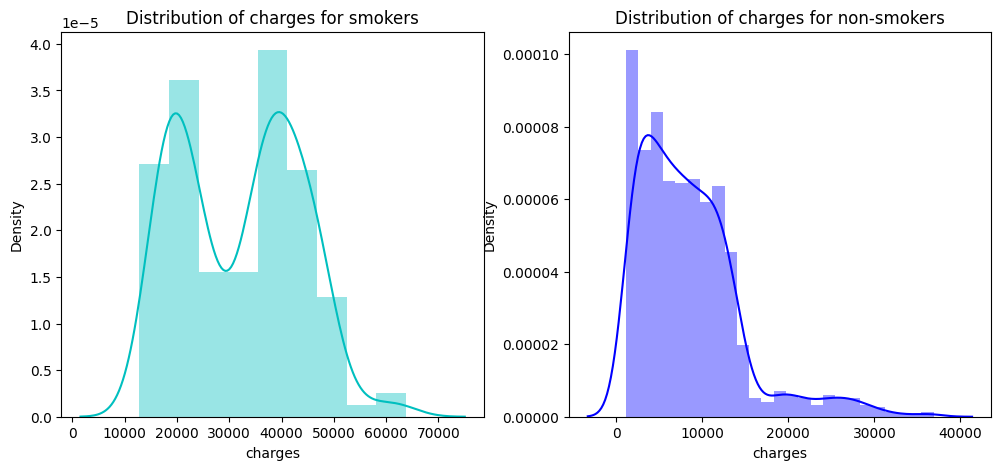

In [13]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

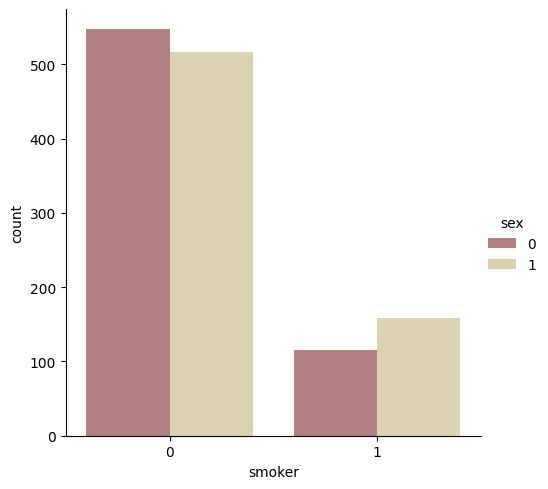

In [14]:
# Noted that '0' is Female and '1' is male

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)



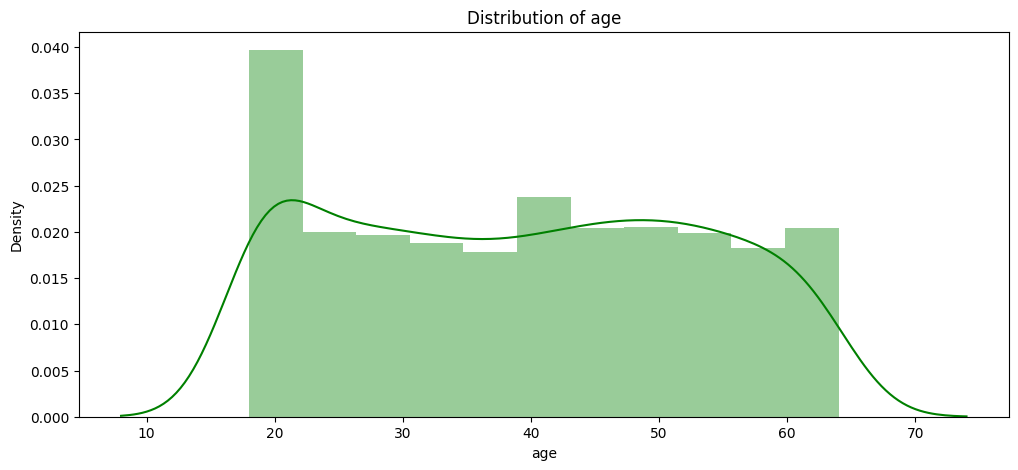

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')